In [ ]:
import pywt
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
small_img = np.array([[3,-1],[6,2]])
coef = pywt.dwt2(small_img,'haar')
coef

(array([[5.]]), (array([[-3.]]), array([[4.]]), array([[0.]])))

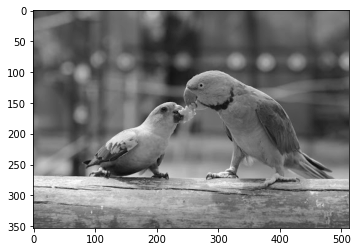

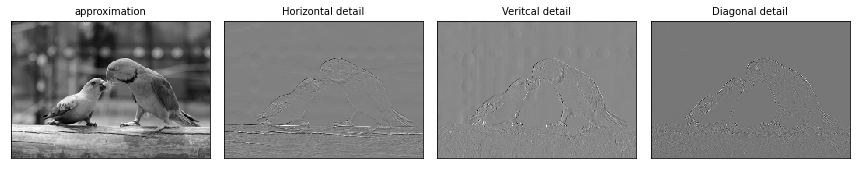

In [ ]:
original = cv2.imread('image.jpg',0)

LL, (LH, HL, HH) = pywt.dwt2(original, 'haar')
titles = ['approximation','Horizontal detail','Veritcal detail','Diagonal detail']
# display
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
  ax = fig.add_subplot(1, 4, i + 1)
  ax.imshow(a, interpolation="nearest",cmap=plt.cm.gray)
  ax.set_title(titles[i], fontsize=10)
  ax.set_xticks([])
  ax.set_yticks([])
fig.tight_layout()
plt.show()

-79.00000000000003
90.50000000000001


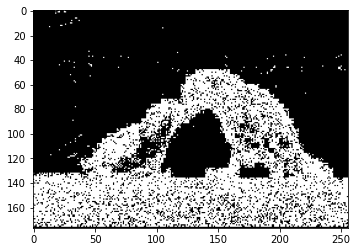

In [ ]:
# print(original.shape)
# print(LL.shape)

# print(LH.min())
# print(LH.max())

print(HH.min())
print(HH.max())

# plt.imshow(abs(HH),cmap='gray')
# plt.show()

# plt.hist(HH,int(HH.max()-HH.min()))
# plt.show()

ret,thresh1 = cv2.threshold(abs(HH),1,255,cv2.THRESH_BINARY)
plt.imshow(thresh1,cmap='gray')
plt.show()

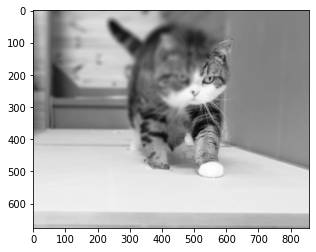

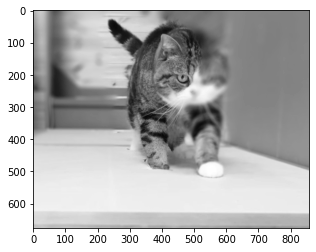

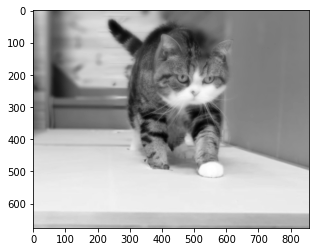

In [ ]:
original = cv2.imread("blur1.jpg",0)
LL1, (LH1, HL1, HH1) = pywt.dwt2(original, 'haar')
original2 = cv2.imread("blur2.jpg",0)
LL2, (LH2, HL2, HH2) = pywt.dwt2(original2, 'haar')
import operator
LL3 = tuple(map(operator.add, LL1, LL2))
LH3 = tuple(map(operator.add, LH1, LH2))
HL3 = tuple(map(operator.add, HL1, HL2))
HH3 = tuple(map(operator.add, HH1, HH2))
coeff3 = LL3, (LH3, HL3, HH3)
plt.imshow(original,cmap='gray')
plt.show()
plt.imshow(original2,cmap='gray')
plt.show()
image_fused = pywt.idwt2(coeff3, 'haar')
plt.imshow(image_fused,cmap='gray')
plt.show()